# K Neighbor Classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing the data

In [2]:
df= pd.read_csv(r'C:\Users\Abhay Thakur\Downloads\python\K-NEarest-Neighbor-master\Classified.csv',index_col=0)

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


### Standardizing the data

We need to standardize the data as KNN model finds the nearest data points, so data values does matter

In [4]:
from sklearn.preprocessing  import StandardScaler


In [5]:
scaler = StandardScaler().fit(df.drop('TARGET CLASS',axis=1))

In [6]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis =1))

In [11]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

Converting to data frame

In [12]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [13]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Splitting the data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train , X_test, y_train, y_test = train_test_split(df_feat,df['TARGET CLASS'])

### KNN model

In [33]:
from sklearn.neighbors import KNeighborsClassifier 
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [34]:
y_pred = knn.predict(X_test)

### Predictions and Evaluation

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

In [36]:
print(confusion_matrix(y_test,y_pred))

[[121  13]
 [  5 111]]


In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       134
           1       0.90      0.96      0.93       116

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250



Though out model works fine but we can improve it by changing the K value

### Finding k value

In [39]:
error_rate = []
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred !=y_test))

Text(0, 0.5, 'Error Rate')

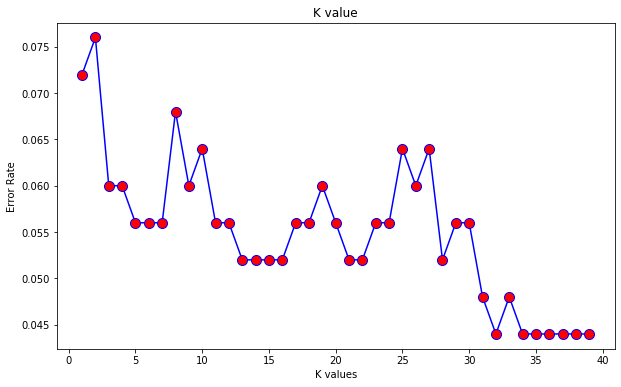

In [45]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', marker='o',markersize = 10, markerfacecolor='red')
plt.title('K value')
plt.xlabel('K values')
plt.ylabel('Error Rate')


Here we see that k is around 33

### KNN model  for k =33

In [46]:
from sklearn.neighbors import KNeighborsClassifier 
knn=KNeighborsClassifier(n_neighbors=33)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=33, p=2,
                     weights='uniform')

In [47]:
y_pred = knn.predict(X_test)

In [48]:
print(confusion_matrix(y_test,y_pred))

[[123  11]
 [  1 115]]


In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       134
           1       0.91      0.99      0.95       116

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.96      0.95      0.95       250



This show that our model has improved a little by changing the K value 